In [1]:
#emoticoane
import itertools
import cv2
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

ImportError: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with LibreSSL 2.8.3. See: https://github.com/urllib3/urllib3/issues/2168

In [75]:
def process_folder(directory, img_size):
    data = []
    for label in outputNames:
        path = os.path.join(directory, label)
        class_num = outputNames.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [76]:
def train_and_test(data):
    indexes = [i for i in range(len(data))]
    train_sample = np.random.choice(indexes, int(0.8 * len(data)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train = [data[i] for i in train_sample]
    test = [data[i] for i in test_sample]
    return train, test

In [77]:
def inputs_outputs_normalisation(train, test, img_size):
    train_input = []
    train_output = []
    test_input = []
    test_output = []
    for feature, label in train:
        train_input.append(feature)
        train_output.append(label)
    for feature, label in test:
        test_input.append(feature)
        test_output.append(label)
    train_input = np.array(train_input) / 255.0
    test_input = np.array(test_input) / 255.0
    train_input.reshape(-1, img_size, img_size, 1)
    train_output = np.array(train_output)
    test_input.reshape(-1, img_size, img_size, 1)
    test_output = np.array(test_output)
    return train_input, train_output, test_input, test_output

In [78]:
def train_by_tool(train_input, train_output, test_input, test_output, img_size):
    model = Sequential()
    model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
    model.add(MaxPool2D())
    model.add(Conv2D(64, 3, padding="same", activation="relu"))
    model.add(MaxPool2D())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    opt = Adam(learning_rate=.001)
    model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    model.fit(train_input, train_output, validation_data=(test_input, test_output), epochs=35)
    return model.predict(x=test_input)

In [79]:
def evaluate(test_outputs, computed_labels, output_names):
    confusion_matrix_calculated = confusion_matrix(test_outputs, computed_labels)
    acc = sum([confusion_matrix_calculated[i][i] for i in range(len(output_names))]) / len(test_outputs)
    prec = {}
    rec = {}
    for i in range(len(output_names)):
        prec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[j][i]
                                                                         for j in range(len(output_names))])
        rec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[i][j]
                                                                        for j in range(len(output_names))])
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall: ', rec)
    return confusion_matrix_calculated

In [80]:
def plotConfusionMatrix(cm, class_names, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                 horizontalalignment='center',
                 color='white' if cm[row, column] > thresh else 'black')
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

  return np.array(data)



Epoch 1/35
5/5 [==============================] - 2s 184ms/step - loss: 0.8514 - accuracy: 0.5000 - val_loss: 0.7014 - val_accuracy: 0.4500
Epoch 2/35
5/5 [==============================] - 1s 115ms/step - loss: 0.6471 - accuracy: 0.6500 - val_loss: 0.6334 - val_accuracy: 0.5750
Epoch 3/35
5/5 [==============================] - 1s 122ms/step - loss: 0.6186 - accuracy: 0.6187 - val_loss: 0.6016 - val_accuracy: 0.7000
Epoch 4/35
5/5 [==============================] - 1s 119ms/step - loss: 0.6076 - accuracy: 0.6500 - val_loss: 0.5500 - val_accuracy: 0.8750
Epoch 5/35
5/5 [==============================] - 1s 117ms/step - loss: 0.5498 - accuracy: 0.7125 - val_loss: 0.5074 - val_accuracy: 0.7750
Epoch 6/35
5/5 [==============================] - 1s 121ms/step - loss: 0.4914 - accuracy: 0.8000 - val_loss: 0.4772 - val_accuracy: 0.8250
Epoch 7/35
5/5 [==============================] - 1s 120ms/step - loss: 0.4522 - accuracy: 0.8000 - val_loss: 0.4390 - val_accuracy: 0.8250
Epoch 8/35
5/5 [====

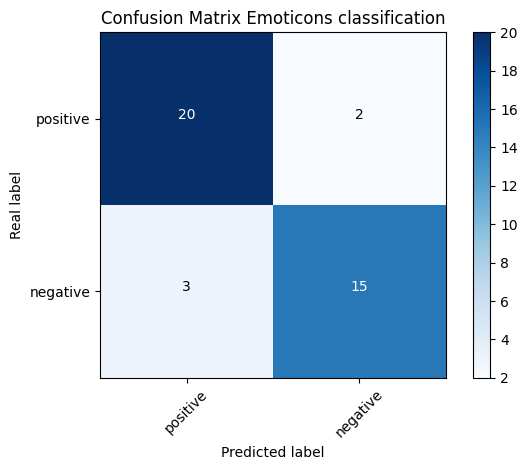

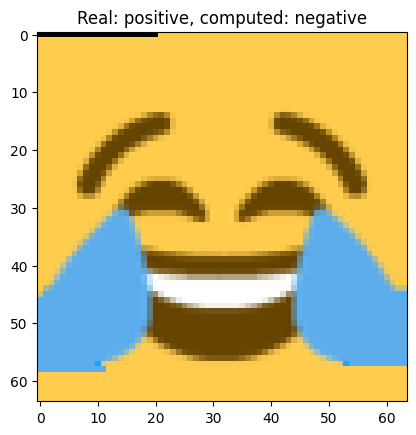

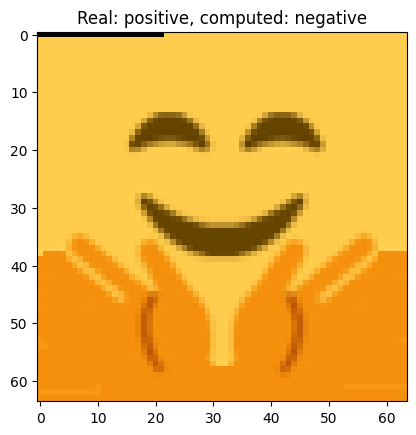

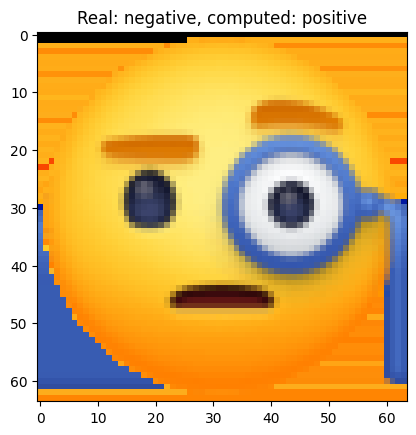

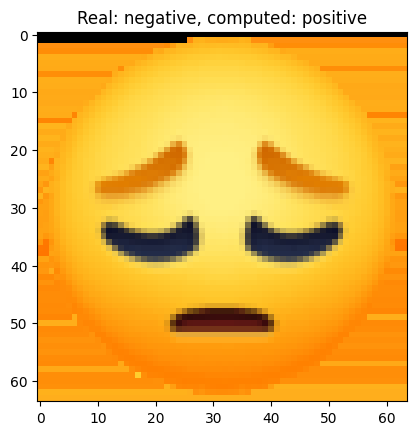

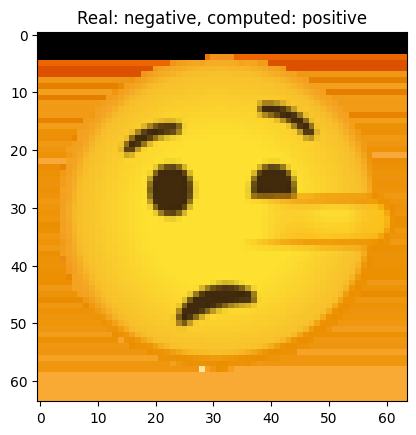

In [81]:
if __name__ == '__main__':
    outputNames = ['positive', 'negative']
    imgSize = 64
    totalData = process_folder('data/emoticons', imgSize)
    trainData, testData, = train_and_test(totalData)
    trainInput, trainOutput, testInput, testOutput = inputs_outputs_normalisation(trainData, testData, imgSize)
    computedOutputs = train_by_tool(trainInput, trainOutput, testInput, testOutput, imgSize)
    computedOutputs = [list(elem).index(max(list(elem))) for elem in computedOutputs]
    confusion_matrix = evaluate(testOutput, computedOutputs, outputNames)
    plotConfusionMatrix(confusion_matrix, outputNames, "Emoticons classification")
    for index in range(len(testOutput)):
        if computedOutputs[index] != testOutput[index]:
            plt.imshow(testData[index][0])
            plt.title('Real: ' + outputNames[testOutput[index]] + ', computed: ' + outputNames[computedOutputs[index]])
            plt.show()

In [2]:
#preantrenat
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from fer import FER
import cv2
import os
from glob import glob


def read_faces_pretrained():
    testInputSet = []
    testOutputSet = []
    images = glob('data/faces/**/*.png', recursive=True)
    for i in range(len(images)):
        img = cv2.imread(images[i])
        img = cv2.resize(img, (96, 96))
        directory = os.path.dirname(os.path.realpath(images[i])).split('\\')[-1]
        testOutputSet.append(directory)
        testInputSet.append(img)
    return testInputSet, testOutputSet


def detect_emotions_pretrained(testInputSet, testOutputSet):
    computed = []
    detector = FER()
    for i in range(len(testInputSet)):
        emotion, score = detector.top_emotion(testInputSet[i])
        if emotion == 'angry':
            computed.append('anger')
        elif emotion == 'sad':
            computed.append('sadness')
        else:
            computed.append(emotion)

    accuracy = accuracy_score(testOutputSet, computed)
    precision = precision_score(testOutputSet, computed, average='weighted', zero_division=0)
    recall = recall_score(testOutputSet, computed, average='weighted', zero_division=0)
    f1 = f1_score(testOutputSet, computed, average='weighted', zero_division=0)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)


if __name__ == '__main__':
    inputs, outputs = read_faces_pretrained()
    detect_emotions_pretrained(inputs, outputs)

Accuracy: 0.5555555555555556
Precision: 0.7162210338680927
Recall: 0.5555555555555556
F1-score: 0.5437782863757376


In [72]:
#manual features
from glob import glob
import os
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from skimage.feature import hog
from skimage.color import rgb2gray


def read_faces_manual():
    testInputSet = []
    testOutputSet = []
    images = glob('data/faces/**/*.png', recursive=True)
    for image_path in images:
        img = Image.open(image_path).convert('RGB')
        img_matrix = np.array(img)
        img_matrix = cv2.resize(img_matrix, (48, 48))

        directory = os.path.dirname(os.path.realpath(image_path)).split('\\')[-1]
        if directory == "anger":
            testOutputSet.append(0)
        elif directory == "disgust":
            testOutputSet.append(1)
        elif directory == "fear":
            testOutputSet.append(2)
        elif directory == "happy":
            testOutputSet.append(3)
        elif directory == "sadness":
            testOutputSet.append(4)
        elif directory == "surprise":
            testOutputSet.append(5)
        else:
            print(directory)
        testInputSet.append(img_matrix)

    testInputSet = np.array(testInputSet)
    testOutputSet = np.array(testOutputSet)

    return testInputSet, testOutputSet


def get_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = rgb2gray(image)
        hog_feature = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        hog_features.append(hog_feature)

    return np.array(hog_features)


def startClassificationEmotions():
    X_data, Y_data = read_faces_manual()
    X_data = get_hog_features(X_data)
    X = X_data.reshape(X_data.shape[0], -1)

    trainInputs, validationInputs, trainOutputs, validationOutputs = train_test_split(
        X, Y_data, test_size=0.20, random_state=42, shuffle=True
    )

    trainInputs = trainInputs / 255.0
    validationInputs = validationInputs / 255.0

    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
        layers.Dense(128, activation="relu"),
        layers.Dense(6, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    model.fit(
        trainInputs,
        trainOutputs,
        epochs=100,
        validation_data=(validationInputs, validationOutputs),
        batch_size=4,
        verbose=0,
    )

    predictedLabels = model.predict(validationInputs, verbose=0)
    predictedLabels = np.argmax(predictedLabels, axis=1)

    print("ACCURACY: ", accuracy_score(validationOutputs, predictedLabels))


startClassificationEmotions()


ACCURACY:  0.4666666666666667


In [40]:
from glob import glob
import os
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models


def read_faces_automated():
    testInputSet = []
    testOutputSet = []
    images = glob('data/faces/**/*.png', recursive=True)
    for image_path in images:
        img = Image.open(image_path).convert('RGBA')
        img_matrix = np.array(img)
        img_matrix = cv2.resize(img_matrix, (32, 32))

        directory = os.path.dirname(os.path.realpath(image_path)).split('\\')[-1]
        if directory == "anger":
            testOutputSet.append(0)
        elif directory == "disgust":
            testOutputSet.append(1)
        elif directory == "fear":
            testOutputSet.append(2)
        elif directory == "happy":
            testOutputSet.append(3)
        elif directory == "sadness":
            testOutputSet.append(4)
        elif directory == "surprise":
            testOutputSet.append(5)
        else:
            print(directory)
        testInputSet.append(img_matrix)

    testInputSet = np.array(testInputSet)
    testOutputSet = np.array(testOutputSet)

    return testInputSet, testOutputSet


def startClassificationEmotions():
    X_data, Y_data = read_faces_automated()
    X = X_data.reshape(X_data.shape[0], 32, 32, 4)

    trainInputs, validationInputs, trainOutputs, validationOutputs = train_test_split(
        X, Y_data, test_size=0.20, random_state=42, shuffle=True
    )

    trainInputs = trainInputs / 255.0
    validationInputs = validationInputs / 255.0

    model = models.Sequential([
        layers.Conv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 4)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(6, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    model.fit(
        trainInputs,
        trainOutputs,
        epochs=50,
        validation_data=(validationInputs, validationOutputs),
        batch_size=4,
        verbose=0,
    )

    predictedLabels = model.predict(validationInputs, verbose=0)
    predictedLabels = np.argmax(predictedLabels, axis=1)

    print("ACCURACY: ", accuracy_score(validationOutputs, predictedLabels))


startClassificationEmotions()


ACCURACY:  0.4666666666666667


In [67]:
import cv2
import os
from glob import glob
from fer import FER
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import LabelEncoder
import numpy as np

labels = ["anger", "disgust", "fear", "happy", "sadness", "surprise", "neutral"]
label_mapping = {
    "angry": "anger",
    "disgust": "disgust",
    "fear": "fear",
    "happy": "happy",
    "sad": "sadness",
    "surprise": "surprise",
    "neutral": "neutral"
}


def read_faces():
    testInputSet = []
    testOutputSet = []
    images = glob('data/faces/**/*.png', recursive=True)

    label_encoder = LabelEncoder()
    label_encoder.fit(labels)

    for image_path in images:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (96, 96))
        directory = os.path.dirname(os.path.realpath(image_path)).split('\\')[-1]

        if directory in label_mapping:
            directory = label_mapping[directory]

        if directory in labels:
            encoded_label = label_encoder.transform([directory])[0]
            one_hot_label = [0] * len(labels)
            one_hot_label[encoded_label] = 1
            testOutputSet.append(one_hot_label)
        else:
            print(directory)

        testInputSet.append(img)

    return testInputSet, testOutputSet


def detect_emotions():
    testInputSet, testOutputSet = read_faces()

    computed = []
    detector = FER()

    for img in testInputSet:
        result = detector.detect_emotions(img)
        emotions_dict = result[0]['emotions']
        emotions = [label_mapping[emotion] for emotion, score in emotions_dict.items() if score > 0.2]
        computed.append(emotions)

    computed_binary = []
    for predicted_labels in computed:
        label_binary = [1 if label in predicted_labels else 0 for label in labels]
        computed_binary.append(label_binary)

    hamming_loss_value = hamming_loss(testOutputSet, computed_binary)
    print("Hamming Loss: ", hamming_loss_value)


detect_emotions()


Hamming Loss:  0.24404761904761904
